 print("Préciser qu'on a du code API avec adresse mais on ne refait pas tourner à chaque fois en cas de url instable")


In [18]:
import pandas
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from package_project import preparation_data

In [19]:
data_1 = pandas.read_csv("/home/onyxia/work/Project/Data/data_climat.csv")
data_2 = pandas.read_csv("/home/onyxia/work/Project/Data/data_tourisme.csv")

print(data_1.DEP.unique())
print(data_2.DEP.unique())

print(data_1.AAAA.unique())
print(data_2.AAAA.unique())

print(data_1.MM.unique())
print(data_2.MM.unique())

print(data_1.shape)
print(data_2.shape)

print(data_1.columns)
print(data_2.columns)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
[2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022]
[ 1  2  3  6  7  8  9 12]
[ 1  2  3  6  7  8  9 12]
(9120, 16)
(8360, 4)
Index(['AAAA', 'MM', 'TX', 'RR', 'UMM', 'FFM', 'TXMIN', 'NBJTX0', 'NBJTX25',
       'NBJTX30', 'NBJTX35', 'NBJNEIG', 'NBJSOLNG', 'DEP', 'saison',
       'periode'],
      dtype='object')
Index(['AAAA', 'MM', 'DEP', 'OBS_VAL

In [20]:
df = preparation_data.merge_data(data_1, data_2)


nul = df[df['OBS_VALUE_CORR'].isnull()]

print(nul.DEP.unique())
print(nul.AAAA.unique())
print(nul.MM.unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72
 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95]
[2020 2021]
[ 1  2  3  6 12]


Nous allons calculer le coefficient de corrélation global avant de s'intéresser aux coefficients de corrélation par département et par saison

In [21]:
base = preparation_data.merge_data(data_1, data_2)

col_arrivees = "OBS_VALUE_CORR"
col_temp = "TX"

base_clean = base.dropna(subset=[col_arrivees, col_temp]).copy()

corr_global = base_clean[col_arrivees].corr(base_clean[col_temp], method="pearson")
print("Corrélation globale arrivées / TX :", corr_global)

Corrélation globale arrivées / TX : 0.15351753869022652


Nous calculons le coefficient de corrélation linéaire de Pearson entre le nombre d'arrivée touristiques (OBS_VALUE_CORR) et la température maximale moyenne mensuelle (TX) sur l'ensemble des départements et des périodes. 
Le coefficient de corrélation globale est 0.15, ce qui traduit un lien positif mais faible entre les deux variables : les hausses de températures s'accompagnent en moyenne d'une légère hausse des arrivées, sans que le climat ne soit le déterminant principal des flux. 

Nous qualifions de forte une corrélation lorsque |r|≥0.5 et nous affichons uniquement les départements présentant une corrélation fortement positive (r≥0.5) ou fortement négative (r≤−0,5).

In [22]:
# Par Département
corr_par_dep = (
    base_clean
    .groupby("DEP")[[col_arrivees, col_temp]] 
    .apply(lambda g: g[col_arrivees].corr(g[col_temp], method="pearson"))
    .reset_index(name="corr_arrivees_TX")
)

dep_corr_forte_pos = corr_par_dep[corr_par_dep["corr_arrivees_TX"] >= 0.75]
liste_dep_forte_positive = corr_par_dep.loc[corr_par_dep["corr_arrivees_TX"] >= 0.75, "DEP"].tolist()
dep_corr_forte_neg = corr_par_dep[corr_par_dep["corr_arrivees_TX"] <= -0.5]

print("Départements à corrélation fortement POSITIVE :")
print(dep_corr_forte_pos)
print(liste_dep_forte_positive)

print("\nDépartements à corrélation fortement NÉGATIVE :")
print(dep_corr_forte_neg)

Départements à corrélation fortement POSITIVE :
    DEP  corr_arrivees_TX
0     1          0.751577
1     2          0.775208
2     3          0.902564
3     4          0.942587
5     6          0.916734
..  ...               ...
83   84          0.945596
84   85          0.933225
85   86          0.779979
86   87          0.894532
88   89          0.934282

[72 rows x 2 columns]
[1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55, 56, 58, 60, 61, 62, 63, 64, 65, 66, 71, 72, 76, 79, 80, 81, 82, 83, 84, 85, 86, 87, 89]

Départements à corrélation fortement NÉGATIVE :
    DEP  corr_arrivees_TX
72   73           -0.5952


In [23]:
# Par Saison
corr_par_saison = (
    base_clean
    .groupby("saison")[[col_arrivees, col_temp]] 
    .apply(lambda g: g[col_arrivees].corr(g[col_temp], method="pearson"))
    .reset_index(name="corr_arrivees_TX")
)

print("\nCorrélation arrivées / TX par saison :")
print(corr_par_saison)

# Par Période
corr_par_periode = (
    base_clean
    .groupby("periode")[[col_arrivees, col_temp]] 
    .apply(lambda g: g[col_arrivees].corr(g[col_temp], method="pearson"))
    .reset_index(name="corr_arrivees_TX")
)

print("\nCorrélation arrivées / TX par période :")
print(corr_par_periode)



Corrélation arrivées / TX par saison :
  saison  corr_arrivees_TX
0  hiver          0.018941
1    été          0.063955

Corrélation arrivées / TX par période :
      periode  corr_arrivees_TX
0  apres_2015          0.143376
1  avant_2015          0.166080


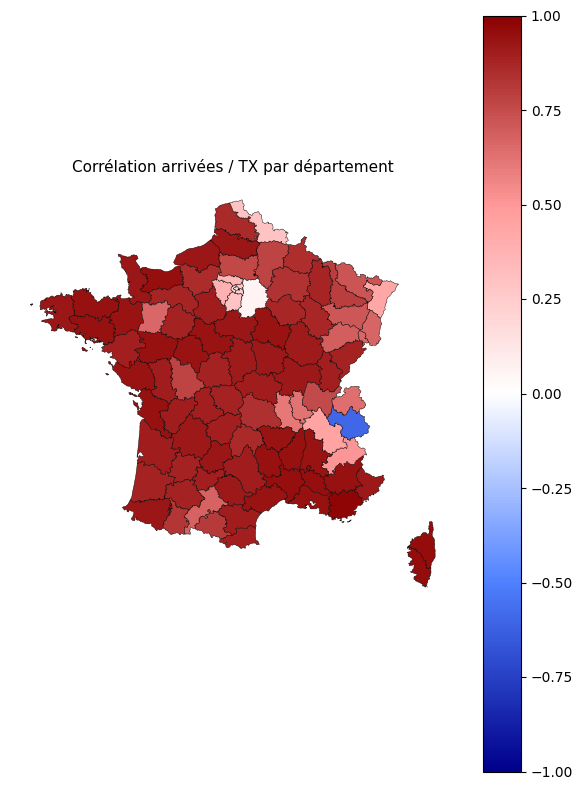

In [24]:
# corr_par_dep contient déjà : DEP, corr_arrivees_TX
corr_dep = corr_par_dep.copy()
corr_dep["DEP"] = corr_dep["DEP"].astype(str).str.zfill(2)

# 1. Fond de carte des départements français
url_dep = "https://france-geojson.gregoiredavid.fr/repo/departements.geojson"
dep_france = gpd.read_file(url_dep)

# Regrouper la Corse (2A, 2B) sur le code 20 utilisé dans les données
dep_france["code_corr"] = dep_france["code"].replace({"2A": "20", "2B": "20"})

# 2. Jointure carte + corrélation
gdf = dep_france.merge(corr_dep, left_on="code_corr", right_on="DEP", how="left")

# 3. Dégradé personnalisé bleu foncé → blanc → rouge foncé
colors = [
    "#00008B",  # bleu foncé (corrélation très négative)
    "#4F81FF",  # bleu plus clair
    "#FFFFFF",  # blanc (corrélation proche de 0)
    "#FF9999",  # rouge clair
    "#8B0000",  # rouge foncé (corrélation très positive)
]
cmap_corr = LinearSegmentedColormap.from_list("corr_degrade_fort", colors)

# Échelle de corrélation : -1 = bleu foncé, 0 = blanc, 1 = rouge foncé
norm = Normalize(vmin=-1, vmax=1)

# 4. Tracé de la carte
fig, ax = plt.subplots(figsize=(6, 8))

gdf.plot(
    column="corr_arrivees_TX",
    cmap=cmap_corr,
    norm=norm,
    edgecolor="black",
    linewidth=0.3,
    legend=True,
    ax=ax,
    missing_kwds={
        "color": "#DDDDDD",    # gris pour "Sans données"
        "edgecolor": "black",
        "hatch": "///",
        "label": "Sans données"
    }
)

ax.set_axis_off()
ax.set_title("Corrélation arrivées / TX par département", fontsize=11)

plt.tight_layout()
plt.show()